In [ ]:
# tools_pandas.ipynb
# https://github.com/rickiepark/handson-ml3/blob/main/tools_pandas.ipynb
# https://colab.research.google.com/github/rickiepark/handson-ml3/blob/main/tools_pandas.ipynb

# 도구 - 판다스
# 사용하기 쉬운 고성능 데이터 구조와 데이터 분석 도구를 제공

# 주 데이터 구조: DataFrame
# 인-메모리 2D 테이블 (열 이름과 행 레이블이 있는 스프레드시트와 비슷)

# 피봇 테이블이나 다른 열 시간으로 열을 계산하고 그래프를 출력하는 기능 등이 포함
# 열 값으로 행을 그루핑할 수 있고 SQL과 비슷하게 테이블을 조인 가능
# 판다스는 시계열 데이터를 다루는데도 뛰어나다


In [1]:
# 판다스를 임포트
import pandas as pd 

In [2]:
# Series 객체
# pandas 라이브러리에서 제공하는 데이터 구조
# Series: 1D 배열. 열 이름과 행 레이블을 가진 스프레드시트의 열과 유사
# DataFrame: 2D 테이블. 열 이름과 행 레이블을 가진 스프레드시트와 유사
# Panel: DataFrame의 딕셔너리

In [4]:
# Series 만들기
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [6]:
# 1D ndarray와 비슷
# Series 객체는 넘파이 ndarray와 비슷하게 동작된다
import numpy as np
np.exp(s)

0      7.389056
1      0.367879
2     20.085537
3    148.413159
dtype: float64

In [7]:
# Series 객체에 대한 산술 연산도 가능
# ndarray와 비슷하게 원소별로 적용된다
s + [1000, 2000, 3000, 4000]

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [8]:
# 넘파이와 비슷하게 Series에 하나의 숫자를 더하면 모든 원소에 더해진다 (브로드캐스팅)
s + 1000

0    1002
1     999
2    1003
3    1005
dtype: int64

In [10]:
# * 나 / 같은 모든 이항 연산과 심지어 조건 연산에서도 적용
s < 0

0    False
1     True
2    False
3    False
dtype: bool

In [11]:
# 인덱스 레이블
# Series 객체에 있는 각 원소는 인덱스 레이블이라는 고유한 식별자를 가지고 있다
# 기본적으로 Series에 있는 원소의 순서이다(0에서 시작)
# 하지만 수동으로 인덱스 레이블을 지정 할 수도 있다

s2 = pd.Series([68, 83, 112, 68], index=["alice", "bob", "charles", "darwin"])
s2


alice       68
bob         83
charles    112
darwin      68
dtype: int64

In [12]:
# dict 처럼 Series를 사용할 수 있다
s2["bob"]

83

In [13]:
# 일반 배열처럼 정수 인덱스를 사용하여 계속 원소에 접근할 수 있다
s2[1]

83

In [14]:
# 레이블이나 정수를 사용해 접근할 때 명확하게 하기 위해
# 레이블은 loc 속성을 사용하고 정수는 iloc 속성을 사용하는 것이 좋다
s2.loc["bob"]

83

In [15]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [16]:
# Series는 인덱스 레이블을 슬라이싱할 수도 있다
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

In [17]:
# 기본 정수 레이블을 사용할 때 예상 외의 결과를 만들 수 있기 때문에 주의해야 한다
surprise = pd.Series([1000, 1001, 1002, 1003])
surprise

0    1000
1    1001
2    1002
3    1003
dtype: int64

In [21]:
surprise_slice = surprise[2:]
surprise_slice

2    1002
3    1003
dtype: int64

In [22]:
# 첫 번째 원소의 인덱스 레이블이 2이다
# 슬라이싱 결과에서 인덱스 레이블이 0인 원소는 없다
try:
  surprise_slice[0]
except KeyError as e:
  print("키 에러:", e)

키 에러: 0


In [27]:
# iloc 속성을 사용해 정수 인덱스로 원소에 접근할 수 있다
# Seriese 객체를 사용할 때 loc와 iloc를 사용하는 것이 좋다
surprise_slice.iloc[0] # = surprise_slice[2]

1002

In [29]:
# dict 에서 초기화
# dict 에서 Seriese 객체를 만들 수 있다
# 키는 인덱스 레이블로 사용된다
weights = {"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weights)
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [32]:
# Series에 포함할 원소를 제어하고
# index를 지정하여 명시적으로 순서를 결정할 수 있다
s4 = pd.Series(weights, index=["colin", "alice"])
s4

colin    86
alice    68
dtype: int64

In [35]:
# 자동 정렬
# 여러 개의 Series 객체를 다룰 때 pandas는 자동으로 인덱스 레이블에 따라 원소를 정렬한다
print(s2.keys())
print(s3.keys())

s2 + s3

Index(['alice', 'bob', 'charles', 'darwin'], dtype='object')
Index(['alice', 'bob', 'colin', 'darwin'], dtype='object')


alice      136.0
bob        166.0
charles      NaN
colin        NaN
darwin     136.0
dtype: float64

In [36]:
# 만들어진 Series는 s2와 s3의 인덱스 레이블의 합집합을 담고 있다
# s2에 'colin'이 없고 s3에 'charles'가 없기 때문에 이 원소는 NaN값을 가진다 (NaN = 누락)

# 자동 정렬은 구조가 다르고 누락된 값이 있는 여러 데이터를 다룰 때 매우 편리하다
# 하지만, 올바른 인덱스 레이블을 지정하는 것을 잊는다면 원하지않는 결과를 얻을 수 있다

In [37]:
s5 = pd.Series([1000, 1000, 1000, 1000])
print('s2 =', s2.values)
print('s5 =', s5.values)

s2 + s5


s2 = [ 68  83 112  68]
s5 = [1000 1000 1000 1000]


alice     NaN
bob       NaN
charles   NaN
darwin    NaN
0         NaN
1         NaN
2         NaN
3         NaN
dtype: float64

In [38]:
# 레이블이 하나도 맞지 않기 때문에 판다스가 이 Series를 정렬할 수 없다
# 따라서 모두 NaN이 되었다

In [39]:
# 스칼라로 초기화
# 스칼라와 인덱스 레이블의 리스트로 Series 객체를 초기화할 수 도 있다
# 모든 원소가 이 스칼라 값으로 설정된다
meaning = pd.Series(42, ["life", "universe", "everything"])
meaning

life          42
universe      42
everything    42
dtype: int64

In [41]:
# Series 이름
# Series는 name을 가질 수 있습니다
s6 = pd.Series([83, 68], index=["bob", "alice"], name="weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

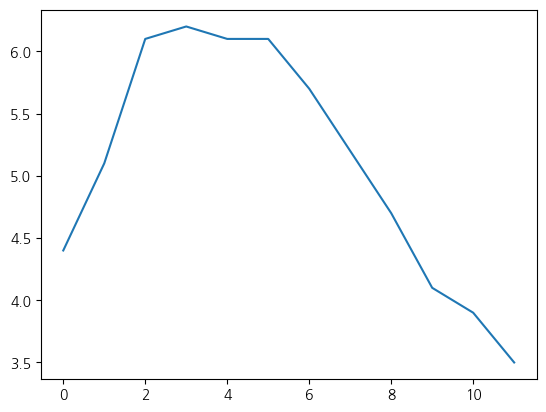

In [43]:
# Series 그래프 출력
# 맷플롭립을 사용해 Series 데이터를 쉽게 그래프로 출력할 수 있다
# 맷플롭릭을 임포트하고 plot() 메서드를 호출

import matplotlib.pyplot as plt

temperatures = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s7 = pd.Series(temperatures, name="Temperature")
s7.plot()
plt.show()

In [44]:
# 특정 종류의 그래프가 필요하다면 판다스 문서의 시각화 섹션에서 예제 코드를 참고
# [Chart visualizzation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

In [46]:
# 시간 다루기
# 판다스는 "타임스탬프"가 들어 있는 데이터를 다루는데 뛰어나다
# (2016Q3 같은) 기간과 ("monthly" 같은) 빈도를 표현할 수 있다
# 기간을 실제 타임스탬프로 변환하거나 그 반대로 변환할 수 있다
# 데이터를 리샘플링하고 원하는 방식으로 값을 모을 수 있다
# 시간대를 다룰 수 있다

# 시간 범위
# pd.date_range()를 사용해 시계열을 만들 수 있다
# 2016.10.29 5:30pm 부터 시작하여 1시간 마다 하나의 datetime을 담고 있는 DatetimeIndex를 반환한다
dates = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
dates


DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [47]:
# 이 DatetimeIndex를 Series의 인덱스로 사용할 수 있다
temp_series = pd.Series(temperatures, dates)
temp_series

2016-10-29 17:30:00    4.4
2016-10-29 18:30:00    5.1
2016-10-29 19:30:00    6.1
2016-10-29 20:30:00    6.2
2016-10-29 21:30:00    6.1
2016-10-29 22:30:00    6.1
2016-10-29 23:30:00    5.7
2016-10-30 00:30:00    5.2
2016-10-30 01:30:00    4.7
2016-10-30 02:30:00    4.1
2016-10-30 03:30:00    3.9
2016-10-30 04:30:00    3.5
Freq: H, dtype: float64

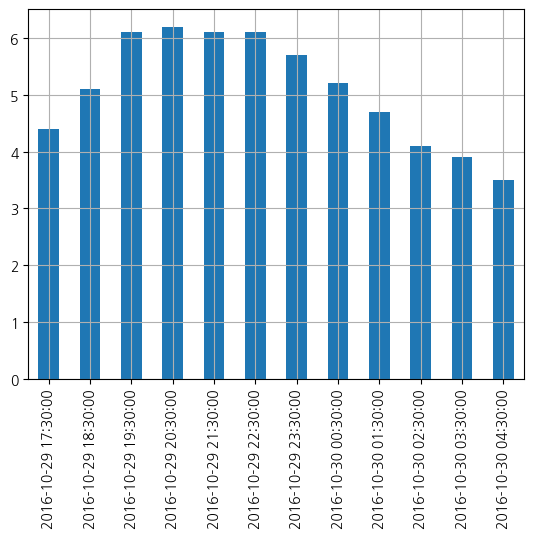

In [48]:
# 이 시리즈를 그래프로 출력
temp_series.plot(kind="bar")

plt.grid(True)
plt.show()

In [50]:
# 리샘플링
# resample() 메서드를 호출하고 새로운 주기를 지정
temp_series_freq_2H = temp_series.resample("2H")
temp_series_freq_2H

In [51]:
# 리샘플링 연산은 사실 지연된 연산이다
# 그래서 Series 객체 대신 DatetimeIndexResampler 객체가 반환된다
# 실제 리샘플링 연산을 수행하려면 mean() 같은 메서드를 호출할 수 있다
# mean() 메서드는 연속적인 시간 쌍에 대해 평균을 계산한다
temp_series_freq_2H = temp_series_freq_2H.mean()

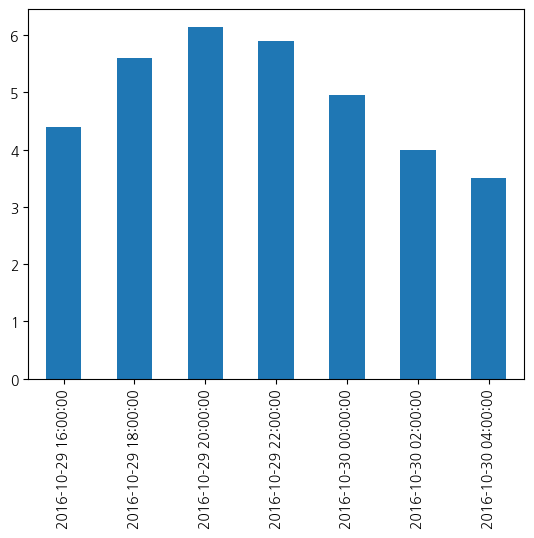

In [52]:
# 그래프
temp_series_freq_2H.plot(kind='bar')
plt.show()

In [53]:
# 평균말고 여떤 집계 합수(aggregation function)도 사용할 수 있다
# 예를 들어, 각 기간에서 최솟값을 찾을 수 있다
temp_series_freq_2H = temp_series.resample('2H').min()
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [54]:
# 또는 동일한 효과를 내는 apply() 메서드를 사용 할 수 있다
temp_series_freq_2H = temp_series.resample('2H').apply(np.min)
temp_series_freq_2H

2016-10-29 16:00:00    4.4
2016-10-29 18:00:00    5.1
2016-10-29 20:00:00    6.1
2016-10-29 22:00:00    5.7
2016-10-30 00:00:00    4.7
2016-10-30 02:00:00    3.9
2016-10-30 04:00:00    3.5
Freq: 2H, dtype: float64

In [55]:
# 업샘플링과 보간
# 업샘플링(즉, 보간을 높인다)
# 하지만 데이터에 구멍을 만든다

temp_series_freq_15min = temp_series.resample('15Min').mean()
temp_series_freq_15min.head(n=10) # 'head'는 상위 n개의 값만 출력한다

2016-10-29 17:30:00    4.4
2016-10-29 17:45:00    NaN
2016-10-29 18:00:00    NaN
2016-10-29 18:15:00    NaN
2016-10-29 18:30:00    5.1
2016-10-29 18:45:00    NaN
2016-10-29 19:00:00    NaN
2016-10-29 19:15:00    NaN
2016-10-29 19:30:00    6.1
2016-10-29 19:45:00    NaN
Freq: 15T, dtype: float64

In [57]:
# 한가지 방법은 보간으로 사이를 채우는 것
# interpolate() 메서드를 호출한다
# 기본값은 선형 보간이지만, 3차 보간(cubic interpolation) 같은 다른 방법을 선택할 수도 있다

temp_series_freq_15min = temp_series.resample("15Min").interpolate(method="cubic")
temp_series_freq_15min.head(n=10)

2016-10-29 17:30:00    4.400000
2016-10-29 17:45:00    4.452911
2016-10-29 18:00:00    4.605113
2016-10-29 18:15:00    4.829758
2016-10-29 18:30:00    5.100000
2016-10-29 18:45:00    5.388992
2016-10-29 19:00:00    5.669887
2016-10-29 19:15:00    5.915839
2016-10-29 19:30:00    6.100000
2016-10-29 19:45:00    6.203621
Freq: 15T, dtype: float64

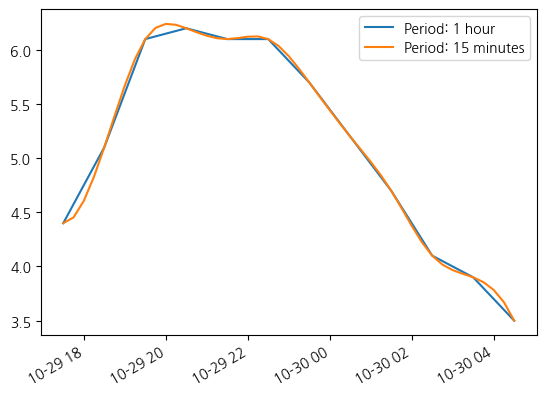

In [59]:
temp_series.plot(label = "Period: 1 hour")
temp_series_freq_15min.plot(label = "Period: 15 minutes")
plt.legend()
plt.show()

In [60]:
# 시간대
# datetime: 단순, 시간대(timezone)을 고려하지 않는다
# tz_localize() 메서드로 시간대를 고려한 datetime을 만들 수 있다
temp_series_ny = temp_series.tz_localize('America/New_York')
temp_series_ny

2016-10-29 17:30:00-04:00    4.4
2016-10-29 18:30:00-04:00    5.1
2016-10-29 19:30:00-04:00    6.1
2016-10-29 20:30:00-04:00    6.2
2016-10-29 21:30:00-04:00    6.1
2016-10-29 22:30:00-04:00    6.1
2016-10-29 23:30:00-04:00    5.7
2016-10-30 00:30:00-04:00    5.2
2016-10-30 01:30:00-04:00    4.7
2016-10-30 02:30:00-04:00    4.1
2016-10-30 03:30:00-04:00    3.9
2016-10-30 04:30:00-04:00    3.5
dtype: float64

In [61]:
# 모든 datetime에 -04:00 추가
# 즉 모든 시간은 UTC-4 시간을 의미한다
# 다음 처럼 파리 시간대로 바꿀수도 있다
temp_series_paris = temp_series_ny.tz_convert("Europe/Paris")
temp_series_paris

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

In [62]:
# UTC와의 차이가 +02:00에서 +01:00으로 바뀐 것을 알 수 있다
# 프랑스가 10월 30일 3am에 겨울시간으로 바뀐다

# 시간대가 없는 표현으로 돌아 갈려면
temp_series_paris_naive = temp_series_paris.tz_localize(None)
temp_series_paris_naive

2016-10-29 23:30:00    4.4
2016-10-30 00:30:00    5.1
2016-10-30 01:30:00    6.1
2016-10-30 02:30:00    6.2
2016-10-30 02:30:00    6.1
2016-10-30 03:30:00    6.1
2016-10-30 04:30:00    5.7
2016-10-30 05:30:00    5.2
2016-10-30 06:30:00    4.7
2016-10-30 07:30:00    4.1
2016-10-30 08:30:00    3.9
2016-10-30 09:30:00    3.5
dtype: float64

In [63]:
# 2:30 이 두번 출력
# 시간대가 없는 datetime을 파리 시간대로 바꿀대 에러가 발생한다
try:
  temp_series_paris_naive.tz_localize("Europe/Paris")
except Exception as e:
  print(type(e))
  print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from 2016-10-30 02:30:00, try using the 'ambiguous' argument


In [64]:
# ambiguos 매개변수를 사용하면 판다스가 타임스탬프의 순서를 기반으로 적절한 DST(일광 절약 시간제)를 추축한다
temp_series_paris_naive.tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    4.4
2016-10-30 00:30:00+02:00    5.1
2016-10-30 01:30:00+02:00    6.1
2016-10-30 02:30:00+02:00    6.2
2016-10-30 02:30:00+01:00    6.1
2016-10-30 03:30:00+01:00    6.1
2016-10-30 04:30:00+01:00    5.7
2016-10-30 05:30:00+01:00    5.2
2016-10-30 06:30:00+01:00    4.7
2016-10-30 07:30:00+01:00    4.1
2016-10-30 08:30:00+01:00    3.9
2016-10-30 09:30:00+01:00    3.5
dtype: float64

In [67]:
# 기간
# pd.period_range() 함수는 DatetimeIndex 가 아니라 PeriodIndex를 반환한다
# 2016과 2017년의 전체 분기
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

In [68]:
# PeriodIndex에 숫자 N을 추가하면 PeriodIndex 빈도의 N 배만큼 이동시킨다
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')

In [69]:
# asfreq() 메서드를 사용하면 PeriodIndex의 빈도를 바꿀 수 있다
# 모든 기간이 늘어나거나 줄어든다
quarters.asfreq('M')

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]')

In [70]:
# 기본적으로 asfreq는 각 기간의 끝에 맞춘다
# 기간의 시작에 맞추도록 변경할 수 있다
quarters.asfreq('M', how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]')

In [71]:
# 간격을 늘릴 수도 있다
quarters.asfreq("A")

PeriodIndex(['2016', '2016', '2016', '2016', '2017', '2017', '2017', '2017'], dtype='period[A-DEC]')

In [72]:
# PeriodIndex로 Series를 만들 수도 있다
quarterly_revenue = pd.Series([300, 320, 290, 390, 320, 360, 310, 410], index = quarters)
quarterly_revenue

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

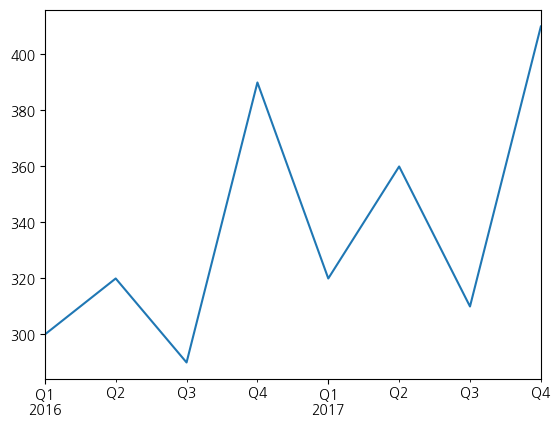

In [74]:
quarterly_revenue.plot(kind="line")
plt.show()

In [77]:
# to_timestamp를 호출해서 기간을 타임스탬프로 변경할 수 있다
# 기본적으로 기간의 첫 번째 날을 반환한다
# 하지만 how와 freq를 지정해서 기간의 마지막 시간을 얻을 수 있다

last_hours = quarterly_revenue.to_timestamp(how="end", freq="H")
last_hours

2016-03-31 23:59:59.999999999    300
2016-06-30 23:59:59.999999999    320
2016-09-30 23:59:59.999999999    290
2016-12-31 23:59:59.999999999    390
2017-03-31 23:59:59.999999999    320
2017-06-30 23:59:59.999999999    360
2017-09-30 23:59:59.999999999    310
2017-12-31 23:59:59.999999999    410
dtype: int64

In [78]:
# to_period를 호출하면 다시 기간으로 돌아간다
last_hours.to_period()

2016Q1    300
2016Q2    320
2016Q3    290
2016Q4    390
2017Q1    320
2017Q2    360
2017Q3    310
2017Q4    410
Freq: Q-DEC, dtype: int64

In [79]:
# 판다스는 여러 가지 시간 관련 함수를 많이 제공한다
# 예를 들면, 2016년 매월 마지막 업무일의 9시를 얻는 방법
months_2016 = pd.period_range("2016", periods=12, freq="M")
one_day_after_last_days = months_2016.asfreq("D") + 1
last_bdays = one_day_after_last_days.to_timestamp() - pd.tseries.offsets.BDay()
last_bdays.to_period("H") + 9

PeriodIndex(['2016-01-29 09:00', '2016-02-29 09:00', '2016-03-31 09:00',
             '2016-04-29 09:00', '2016-05-31 09:00', '2016-06-30 09:00',
             '2016-07-29 09:00', '2016-08-31 09:00', '2016-09-30 09:00',
             '2016-10-31 09:00', '2016-11-30 09:00', '2016-12-30 09:00'],
            dtype='period[H]')

In [80]:
# DataFrame 만들기
# Series 객체의 딕셔너리를 전달하여 데이터프레임을 만들 수 있다
people_dict = {
  "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
  "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
  "children": pd.Series([0, 3], index=["charles", "bob"]),
  "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

people = pd.DataFrame(people_dict)
people

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [81]:
# Series: 인덱스를 기반으로 자동 정렬된다
# 누락된 값은 NaN으로 표현된다
# Series 이름은 무시된다
# DataFrame은 주피터 노트북에서 테이블 형태로 출력된다

# 예상하는 방식으로 열을 참조할 수 있고 Series 객체가 반환된다

people["birthyear"]

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [83]:
# 동시에 여러 개의 열을 선택할 수 있다
people[["birthyear", "hobby"]]

,birthyear,hobby
alice,1985,Biking
bob,1984,Dancing
charles,1992,NaN


In [84]:
# 열 리스트나 행 인덱스 레이블을 DataFrame 생성자에 전달하면
# 해당 열과 행으로 채워진 데이터프레임이 반환된다
d2 = pd.DataFrame(
  people_dict,
  columns=["birthyear", "weight", "height"],
  index=["bob", "alice", "eugene"]
)

d2

,birthyear,weight,height
bob,1984.0,83.0,NaN
alice,1985.0,68.0,NaN
eugene,NaN,NaN,NaN


In [85]:
# DaraFrame을 만드는 또 다른 편리한 방법은 
# ndarray나 리스트의 리스트로 모든 값을 생성자에게 전달하고
# 열 이름이나 행 인덱스 레이블을 각기 지정하는 것

values = [
  [1985, np.nan, "Biking",   68],
  [1984, 3,      "Dancing",  83],
  [1992, 0,      np.nan,    112]
]

d3 = pd.DataFrame(
  values,
  columns=["birthyear", "children", "hobby", "weight"],
  index=["alice", "bob", "charles"]
)

d3


,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3.0,Dancing,83
charles,1992,0.0,NaN,112


In [90]:
# 누락된 값을 지정하려면 np.nan이나 넘파이 마스크 배열을 사용한다
masked_array = np.ma.asarray(values, dtype=np.object_)
masked_array[(0, 2), (1,2)] = np.ma.masked # mask 배열은 각 아이템 값을 True 와 False 로 매핑
d3 = pd.DataFrame(
  masked_array,
  columns=["birthyear", "children", "hobby", "weight"],
  index=["alice", "bob", "charles"]
)

d3

,birthyear,children,hobby,weight
alice,1985,NaN,Biking,68
bob,1984,3,Dancing,83
charles,1992,0,NaN,112


In [93]:
# ndarray 대신 DataFrame 객체를 전달할 수도 있다
d4 = pd.DataFrame(
  d3,
  columns=["hobby", "children"],
  index=["alice", "bob"]
)

d4

,hobby,children
alice,Biking,NaN
bob,Dancing,3


In [95]:
# 디셔너리의 딕셔너리(또는 리스트의 리스트)로 DataFrame을 만들 수 있다

people = pd.DataFrame({
  "birthyear": {"alice":1985, "bob": 1984, "charles": 1992},
  "hobby": {"alice":"Biking", "bob": "Dancing"},
  "weight": {"alice":68, "bob": 83, "charles": 112},
  "children": {"bob": 3, "charles": 0}
})

people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [97]:
# 멀티 인덱싱
# 모든 열이 같은 크기의 튜플이면 멀티 인덱스로 인식한다
# 열 인덱스 레이블에도 같은 방식이 적용된다

d5 = pd.DataFrame({
   ("public", "birthyear"):
        {("Paris","alice"):1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"):"Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"):68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"):np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
})

d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [99]:
# pulic 열을 모두 담은 DataFrame을 손쉽게 만들 수 있다
d5['public']

birthyear    hobby
Paris  alice         1985   Biking
       bob           1984  Dancing
London charles       1992      NaN

In [102]:
d5["public", "hobby"] # df["public", "hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: object

In [103]:
# 레벨 낮추기
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [104]:
# 열의 레벨이 2개이고 인덱스 레벨이 2개이다
# droplevel()을 사용해 열 레벨을 낮출 수 있다
d5.columns = d5.columns.droplevel(level = 0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

In [105]:
# 전치
# T 속성을 사용해 열과 인덱스를 바꿀 수 있다
d6 = d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

In [106]:
# 레벨 스택과 언스택
# stack()  가장 낮은 열 레벨을 가장 낮은 인덱스 뒤에 추가한다
d7 = d6.stack()
d7

London    Paris
birthyear alice      NaN     1985
          bob        NaN     1984
          charles   1992      NaN
hobby     alice      NaN   Biking
          bob        NaN  Dancing
weight    alice      NaN       68
          bob        NaN       83
          charles    112      NaN
children  bob        NaN      3.0
          charles    0.0      NaN

In [111]:
# NaN 값: 이전에 없던 조합이 생겼기 때문
# unstack()을 호출하면 반대가 된다. 많은 NaN 생성
d8 = d7.unstack()
d8

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

In [112]:
# unstack()을 호출하면 Series 객체가 만들어진다
d9 = d8.unstack()
d9

London  alice    birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        bob      birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
        charles  birthyear       1992
                 children         0.0
                 hobby            NaN
                 weight           112
Paris   alice    birthyear       1985
                 children         NaN
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 children         3.0
                 hobby        Dancing
                 weight            83
        charles  birthyear        NaN
                 children         NaN
                 hobby            NaN
                 weight           NaN
dtype: object

In [113]:
# stack()과 unstack() 메서드를 사용할 때 스택/언스택할 level를 선택할 수 있다
# 한번에 여러 개의 레벨을 스택/언스택할 수 있다
d10 = d9.unstack(level = (0,1))
d10

London                Paris                 
           alice  bob charles   alice      bob charles
birthyear    NaN  NaN    1992    1985     1984     NaN
children     NaN  NaN     0.0     NaN      3.0     NaN
hobby        NaN  NaN     NaN  Biking  Dancing     NaN
weight       NaN  NaN     112      68       83     NaN

In [114]:
# 대부분의 메서드는 수정된 복사본을 반환한다
# stack(), unstack() 메서드는 객체를 수정하지 않는다. 대신 복사본을 만들어 반환한다
# 판다스에 있는 대부분의 메서드는 이렇게 동작한다

In [115]:
# 행 참조하기
# people DataFrame

people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [116]:
# loc 속성으로 열 대신 행을 참조할 수 있다
# DataFrame의 열 이름이 행 인덱스 레이블로 매핑된 Series 객체가 반환된다
people.loc['charles']

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [117]:
# iloc 속성을 사용해 정수 인덱스로 행을 참조할 수 있다
people.iloc[2]

birthyear    1992
hobby         NaN
weight        112
children      0.0
Name: charles, dtype: object

In [118]:
# 행을 슬라이싱할 수 있으면 DataFrame 객체가 반환된다
people.iloc[1:3]

,birthyear,hobby,weight,children
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [121]:
# 마지막으로 불리언 배열을 전달하여 해당하는 행을 가져올 수 있다
people[np.array([True, False, True])]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
charles,1992,NaN,112,0.0


In [122]:
# 불리언 표현식을 사용할 때 유용하다
people[people["birthyear"] < 1990]

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0


In [123]:
# 열 추가, 삭제
# DataFrame을 Series의 딕셔너리처럼 다룰 수 있다
people

,birthyear,hobby,weight,children
alice,1985,Biking,68,NaN
bob,1984,Dancing,83,3.0
charles,1992,NaN,112,0.0


In [139]:
people_dict = {
  "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
  "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
  "children": pd.Series([0, 3], index=["charles", "bob"]),
  "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

people = pd.DataFrame(people_dict)

people["age"] = 2018 - people["birthyear"] # age 열 추가
people["over 30"] = people["age"] > 30 # over 30 열 추가
birthyears = people.pop("birthyear")
del people["children"]

people

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64
         weight    hobby  age  over 30
alice        68   Biking   33     True
bob          83  Dancing   34     True
charles     112      NaN   26    False


In [140]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [141]:
# 새로운 열을 추가할 때 행의 개수는 같아야 한다
# 누락된 행응 NaN으로 채워지고 추가적인 행은 무시된다

people["pets"] = pd.Series({"bob": 0, "charles": 5, "eugene":1})  # alice 누락됨, eugene은 무시됨
people

,weight,hobby,age,over 30,pets
alice,68,Biking,33,True,NaN
bob,83,Dancing,34,True,0.0
charles,112,NaN,26,False,5.0


In [142]:
# 새로운 열을 추가할 때 기본적으로 (오른쪽) 끝에 추가된다
# inser() 메서드를 사용해 다른 곳에 열을 추가할 수 있다
people.insert(1, 'height', [172, 181, 185])
people

,weight,height,hobby,age,over 30,pets
alice,68,172,Biking,33,True,NaN
bob,83,181,Dancing,34,True,0.0
charles,112,185,NaN,26,False,5.0


In [143]:
# 새로운 열 할당하기
# assign() 메서드를 호출하여 새로운 열을 만들 수도 있다
# 이는 새로운 DataFrame 객체를 반환하며 원본 객체는 변경되지 않는다
people.assign(
  body_mass_index = people["weight"] / (people["height"] / 100) ** 2,
  has_pets = people["pets"] > 0
)

,weight,height,hobby,age,over 30,pets,body_mass_index,has_pets
alice,68,172,Biking,33,True,NaN,22.985398,False
bob,83,181,Dancing,34,True,0.0,25.335002,False
charles,112,185,NaN,26,False,5.0,32.724617,True


In [ ]:
#